Found 320 files belonging to 4 classes.
Found 320 files belonging to 4 classes.
Epoch 1/100
5/5 [==============================] - 9s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 4/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 6/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 7/100
5/5 [===========================

<Figure size 720x720 with 0 Axes>

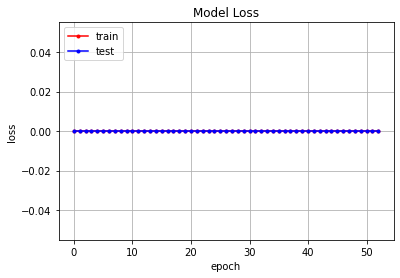

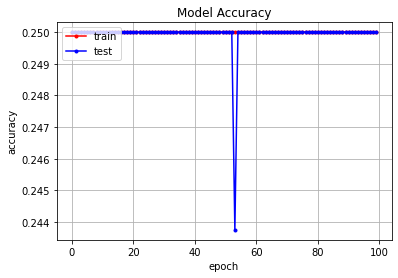


Total Running Time for the model:  0h 15m 15s


In [2]:
# Lab25- VGGNet

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from functools import partial
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from google.colab import drive, files
import os
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

# # train_data_dir = '/content/drive/MyDrive/MURA-v1.1/train-100'
# # test_data_dir = '/content/drive/MyDrive/MURA-v1.1/valid-100'
# train_data_dir = './Mura Dataset ML 50% dataset/MURA-v1.1/train'
# test_data_dir = './Mura Dataset ML 50% dataset/MURA-v1.1/valid'
# #
# # train_data_dir = '/content/drive/MyDrive/Mura Datase_50%_Training Data_100%_Test data/MURA-v1.1/train'
# # test_data_dir = '/content/drive/MyDrive/Mura Datase_50%_Training Data_100%_Test data/MURA-v1.1/valid'

# load
# data_dir = './HW1-1_data'
data_dir = './images/'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))


batch_size = 64
img_height = 256
img_width = 256
trainX = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size)
testX = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size)
classes = trainX.class_names
plt.figure(figsize=(10, 10))

model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# history = model.fit(trainX, validation_data= testX, steps_per_epoch=10, validation_steps=10, epochs=20)
history = model.fit(trainX, validation_data= testX, epochs=100)



y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']


fig, (ax1) = plt.subplots(1)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.title('Model Loss')
plt.setp(ax1, xlabel='epoch', ylabel='loss')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./loss per epochs for VGGNET-graph.jpg")
plt.show()

fig, (ax2) = plt.subplots(1)
ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.title('Model Accuracy') 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./accuracy per epochs for VGGNET-graph.jpg")
plt.show()


# #summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("./accuracy per epochs for VGG-graph.jpg")
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("./loss per epochs for VGG-graph.jpg")
# plt.show()

end = datetime.datetime.now()
diff = (end - start)
datetime.timedelta(seconds=10, microseconds=885206)
diff_seconds = int(diff.total_seconds())
minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"
print("\nTotal Running Time for the model: ", hms)